Nuestra capacidad para resolver detalles en observaciones astronómicas está limitada por la difracción de la luz.en nuestros telescopios La luz de las estrellas puede tratarse efectivamente como si viniera de una fuente puntualen el infinito Cuando dicha luz, con longitud de onda λ , pasa a través de la abertura circular de untelescopio (que asumiremos que tiene un radio de unidad) y está enfocado por el telescopio en el focoplano, no produce un solo punto, sino un patrón de difracción circular que consiste en un punto centralrodeado por una serie de anillos concéntricos. La intensidad de la luz en este patrón de difracción.es dado por

$I(r) =(J_1(r)/kr)^2$


a) use N=1000 para solucionar el metodo de simpson para encontrar $J_o$,  $J_1$   y $J_2$ con  $x=0$ y $y=0$

b)Haga un segundo programa que haga un diagrama de densidad de la intensidad de la difracción circular.patrón de una fuente de luz puntual con λ = 500 nm, en una región cuadrada del plano focal,usando la fórmula dada arriba. Su imagen debe cubrir valores de r desde cero hastaapr




In [12]:
from numpy import linspace
from numpy import cos,sin
from math import pi
from pylab import plot, show
from matplotlib import pyplot as plt
print ('....')

....


In [13]:
#para definir la funcion a integrar 

def funcionBessel(m,x,theta):
  F=cos(m*theta-x*sin(theta))
  return (F)

print('...')

...


In [14]:
def metodosimpson (N, a, b, m, x):
 
    h=(b-a)/N

    suma=funcionBessel(m,x, a)+funcionBessel(m,x,b) 

    for i in range(1,N,2): 
        suma+=4*funcionBessel(m,x,a+i*h)
     
    for i in range(2,N,2):
        suma+=2*funcionBessel(m,x,a+i*h)
    I=(1/3)*h*suma
    J=(1/pi)*I #para obtener la funcion de bessel
    return(J)

print('...')


...


In [15]:
N=1000 #dados por el problema 
a=0 
b=pi 
xi=0 
xf=20 
xrange=linspace(xi,xf,N) 
print('...')

...


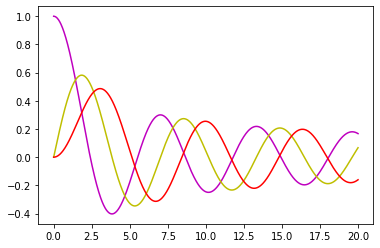

In [16]:
Jm_0=[]
Jm_1=[]
Jm_2=[]

for i in xrange:
  m0=metodosimpson (N,a,b,0,i)
  Jm_0.append(m0)

for i in xrange:
  m1=metodosimpson (N,a,b,1,i)
  Jm_1.append(m1)

for i in xrange:
  m2=metodosimpson (N,a,b,2,i)
  Jm_2.append(m2)
#graficar en un solo plano 
plot(xrange,Jm_0,'m-')
#show()
plot(xrange,Jm_1,'y-')
#show()
plot(xrange,Jm_2,'r-')
#show()

In [17]:
def r(x, y):
  f=sqrt(x**2 + y**2)
  return (f)
print('...')

...


In [18]:
from numpy import zeros, array
from math import sqrt
from pylab import imshow
from pylab import colormaps, cool, hsv, summer, viridis

print ('...')

...


In [19]:
landa=500e-9  
k=2*pi/landa 
m=1
print('...')

...


In [20]:
gArray=zeros([80,80],float)
limites=linspace(-1e-6,1e-6,80) 
xx=array(limites,float)
yy=array(limites,float)
print('...')

...


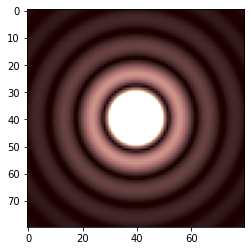

In [21]:
for i in range(0,80,1): 
    x = xx[i]
    for j in range(0,80,1):
        y=yy[j]
        r=sqrt(x**2 + y**2)
        K=k*r
        Inte=metodosimpson(N,a,b,m,K)/K
        Inte=Inte**2
        gArray[i,j]=(Inte)
        
imshow(gArray,'pink', vmax=0.01)